In [1]:
import warnings
warnings.filterwarnings("ignore")
import jieba
import numpy as np
import pandas as pd
import codecs   # codecs提供的open方法来指定打开文件的语言编码，它会在读取时自动转换为内部unicode
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud    # 调云包

## 读取数据

In [2]:
# pandas读取数据
df = pd.read_csv('F:\DataSets/news_collection/news_collection.csv', encoding='utf-8').dropna()
# 转成list
content = df['desc'].values.tolist()
# 分词与统计词频
segment = []
for line in content:
    try:
        segs = jieba.lcut(line)
        for seg in segs:
            if len(seg) > 1 and seg!='\r\n':
                segment.append(seg)
    except:
        print(line)
        continue

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\WZQAdmin\AppData\Local\Temp\jieba.cache
Loading model cost 1.568 seconds.
Prefix dict has been built succesfully.


## 去停用词

In [6]:
words_df = pd.DataFrame({'segment':segment})
stopwords = pd.read_csv('../Data/stopwords_cn.txt', index_col=False, quoting=3, sep='\t', names=['stopword'], encoding='utf-8')
words_df = words_df[~words_df.segment.isin(stopwords.stopword)]

## 统计排序

In [11]:
word_stat = words_df.groupby(by=['segment'])['segment'].agg({'计数':np.size})
word_stat = word_stat.reset_index().sort_values(by=['计数'], ascending=False)
word_stat.head()

,segment,计数
281153,表示,30639
48893,今天,30363
90862,台灣,20472
256461,總統,18468
39454,中國,18227


## 构建词云

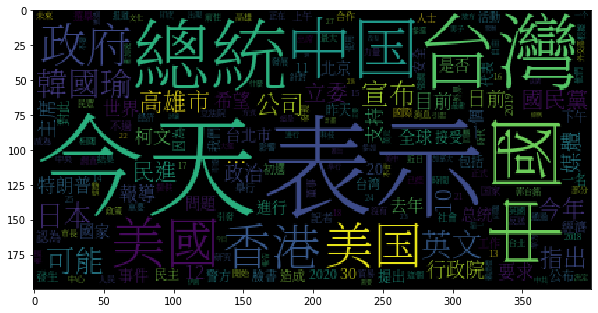

In [12]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
wordcloud = WordCloud(font_path='F:\DataSets/SourceHan/SourceHanSerifTC-ExtraLight.otf', background_color='black', max_font_size=80)
word_frequence = {x[0] : x[1] for x in word_stat.head(1000).values}
wordcloud = wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

## 自定义词云背景

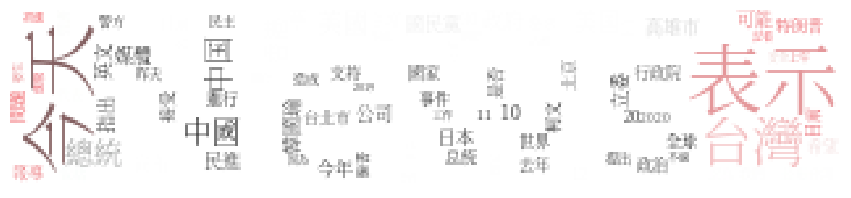

In [16]:
import imageio
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)
from wordcloud import WordCloud, ImageColorGenerator

bimg = imageio.imread('../Images/cloudmask.jpg')
wordcloud = WordCloud(background_color='white', mask=bimg, font_path='F:\DataSets/SourceHan/SourceHanSerifTC-Light.otf', max_font_size=200)
word_frequence = {x[0]:x[1] for x in word_stat.head(1000).values}
wordcloud = wordcloud.fit_words(word_frequence)
bimgColors = ImageColorGenerator(bimg)
plt.axis('off')
plt.imshow(wordcloud.recolor(color_func=bimgColors))

## 新闻关键字抽取

### TF-IDF

In [18]:
import jieba.analyse as analyse

content = "".join(content)
print(analyse.extract_tags(content, topK=30, withWeight=False, allowPOS=()))

['台灣', '總統', '中國', '美國', '今天', '韓國瑜', '表示', '立委', '...', '10', '國民黨', '高雄市', '香港', '特朗普', '柯文', '民進', '媒體', '英文', '12', '報導', '國家', '美国', '30', '20', '行政院', '進行', '一個', '問題', '臉書', '政府']


### TextRank

In [20]:
print(analyse.textrank(content, topK=30, withWeight=False, allowPOS=('n', 'ns', 'v', 'vn')))

KeyboardInterrupt: 